The following system, first considered by Schlögl (1972), has two favourable states.
$$
3 A \overset{k_1}{\underset{k_2}\leftrightarrow} 2 A
$$
$$
A \overset{k_3}{\underset{k_4}\longleftrightarrow}\emptyset
$$
The (approximate) deterministic ODE/model can be written for the concentration $a(t)$ as
$$
\frac{\mathrm{d} a}{\mathrm{d} t}=-k_{1} a^{3}+k_{2} a^{2}-k_{3} a+k_{4}
$$
To solve steady-state solution, we first write $\bar{A}(t)=a(t) v$ to give:
$$
\frac{\mathrm{d} \bar{A}}{\mathrm{d} t}=-\frac{k_{1}}{v^{2}} \bar{A}^{3}+\frac{k_{2}}{v} \bar{A}^{2}-k_{3} \bar{A}+k_{4} v
$$
and
$$
-\left(k_{1} / v^{2}\right) \bar{A}^{3}+\left(k_{2} / v\right) \bar{A}^{2}-k_{3} \bar{A}+k_{4} v=0
$$
We choose the rate constants to be $k_{1} / v^{2}=2.5 \times 10^{-4} \min ^{-1}, k_{2} / v=0.18 \mathrm{min}^{-1},$ $k_{3}=37.5 \mathrm{min}^{-1}$ and $k_{4} v=2200 \mathrm{min}^{-1} .$ Then, we find that $$
\bar{A}_{s 1}=100, \quad \bar{A}_{u}=220 \quad \text { and } \quad \bar{A}_{s 2}=400
$$
$\bar{A}_{s 1}$ and $\bar{A}_{s 2}$ **are stable steady states and $\bar{A}_{u}$ is an unstable steady state**. **The solution of the ODE converges to one of the steady states, with the choice of the steady state dependent on the initial condition.**

If the initial condition $\bar{A}(0)$ satisfies $\bar{A}(0) \in\left[0, \bar{A}_{u}\right),$ then the solution converges to the stable steady state $\bar{A}_{s 1}=100 .$ If $\bar{A}(0)>\bar{A}_{u}$ then the solution converges to the second stable steady state $\bar{A}_{s 2}=400$

The following implementation shows **periodic fluctuations,which is missed by the deterministic description**. 

In [1]:
import numpy as np
from numpy.random import uniform
from scipy.integrate import odeint

def favorStat(k1,k2,k3,k4,v,T,A0=0):
    ct = [A0]
    tlst = [0]
    a4 = k4*v
    responds = {0:-1,1:+1,2:-1,3:+1}
    while tlst[-1]<T:
        a3 = ct[-1]*k3
        if ct[-1]>2:
            a1 = ct[-1]*(ct[-1]-1)*(ct[-1]-2)*k1/v**2
        else:
            a1 = 0
        if ct[-1]>1:
            a2 = ct[-1]*(ct[-1]-1)*k2/v
        else:
            a2 = 0
        a = a1+a2+a3+a4
        plst = np.cumsum([a1,a2,a3,a4])/a
        r1,r2 = uniform(size=2)
        tau = 1/a*np.log(1/r1)
        tlst.append(tlst[-1]+tau)
        dA=responds[sum(plst<r2)]
        ct.append(ct[-1]+dA)
    return tlst,ct

def solvODE(k1,k2,k3,k4,v,T):
    p1,p2,p3,p4=-k1/v**2,k2/v,-k3,k4*v
    
    def func(a,t,f1,f2,f3,f4):
        return f1*a**3+f2*a**2+f3*a+f4
    
    tt = np.linspace(0, T, 1000)
    sol = odeint(func, 0, tt, args=(p1,p2,p3,p4))
    return tt,sol[:,0]

In [5]:
V=1
K1=0.00025
K2=0.18
K3=37.5
K4=2200
T=100
simt,simct = favorStat(K1,K2,K3,K4,V,T)
odet,odect = solvODE(K1,K2,K3,K4,V,T)

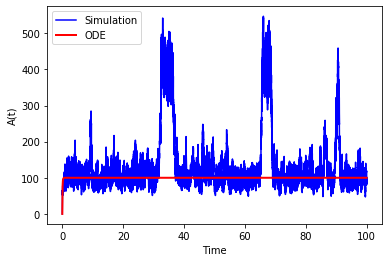

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(simt,simct,'b-',label='Simulation')
plt.plot(odet,odect,'r-',linewidth=2,label='ODE')
plt.xlabel('Time')
plt.ylabel('A(t)')
plt.legend(loc='upper left')

**The fluctuation missed by ODE is shown above**

## Master equation
Let $p_{n}(t)$ be the probability that there are $n$ molecules of $A$ at time $t$ in the system, we have the following equation:
$$
\begin{aligned} \frac{\mathrm{d} p_{n}}{\mathrm{d} t}=&\left(k_{1} / v^{2}\right)(n+1) n(n-1) p_{n+1}-\left(k_{1} / v^{2}\right) n(n-1)(n-2) p_{n} \\ &+\left(k_{2} / v\right)(n-1)(n-2) p_{n-1}-\left(k_{2} / v\right) n(n-1) p_{n} \\ &+k_{3}(n+1) p_{n+1}-k_{3} n p_{n}+k_{4} v p_{n-1}-k_{4} v p_{n} \end{aligned}
$$
with $\frac{\mathrm{d} p_{n}}{\mathrm{d} t}=0$, we have the stationary distribution:
$$
\phi(n)=\phi(0) \prod_{i=0}^{n-1} \frac{\left(k_{2} / v\right) i(i-1)+k_{4} v}{\left(k_{1} / v^{2}\right)(i+1) i(i-1)+k_{3}(i+1)}
$$